In [5]:
import seaborn as sns
import pandas as pd

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Scatter 

<Axes: xlabel='total_bill', ylabel='tip'>

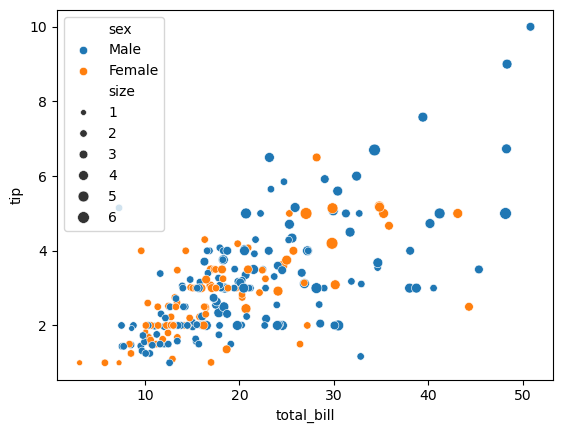

In [5]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['size'])

In [13]:
df_country = pd.read_csv('data/global_internet_users.csv')
df_country.head(3)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0


In [15]:
sns.scatterplot(x='year', y='No. of Internet Users', data = 'df_country' , hue='Entity' ,hue_order = ['India','Finland','china'] )

TypeError: Data source must be a DataFrame or Mapping, not <class 'str'>.

In [8]:
import plotly.express as px 
fig = px.scatter(
    data_frame = df_country, x='Year', y='No. of Internet Users', width = 400, height = 400
)
fig.show()

In [11]:
color = px.colors.qualitative.Light24
px.scatter(data_frame=df_country, x='Year', y='No. of Internet Users',
           width=400, height=400, color = 'Entity', color_discrete_sequence=color, symbol='Entity')

산점도는 데이터의 양에 따라 효과가 달라진다.
size 그룹간 차이 식별이 어려워질 수 있다.
최대 2개 정도만 구분 - hue , style 

# regplot

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


회귀선 + 산점도 => regplot 

오차구간을 함께 볼 수 잇다. ci 속성

<Axes: xlabel='total_bill', ylabel='tip'>

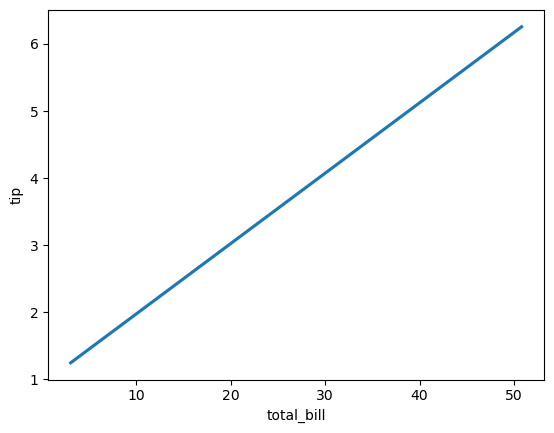

In [17]:
sns.regplot(x=df['total_bill'], y=df['tip'], scatter=False, ci=None)

# size, tip으로 regplot 그리기

In [2]:
import plotly.express as px

In [9]:
# plotly에서 regplot
px.scatter(data_frame=df, x='total_bill', y='tip',
           width=400, height=400, trendline='ols',
           color= 'smoker')

<Axes: xlabel='size', ylabel='tip'>

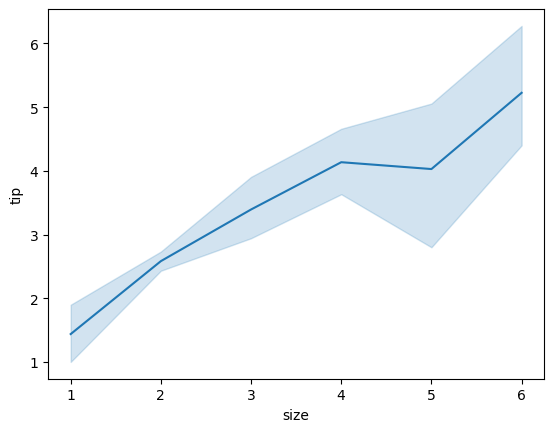

In [10]:
sns.lineplot(x='size', y='tip', data=df)

In [11]:
entities = ['China', 'India', 'Finland']

In [ ]:
sns.lineplot(
    x='Year', y='No. of Internet Users', data=df_country, hue=entities
)
sns.scatterplot(
    x='Year', y='No. of Internet Users', data= df_country
)

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 8867 and the vector passed to `hue` has length 3.

# boxplt
이상치 탐지, 통계량 확인, 분포 확인

In [21]:
ev_df = pd.read_csv('data/EV_charge.csv')
ev_df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


<Axes: xlabel='weekday', ylabel='kwhTotal'>

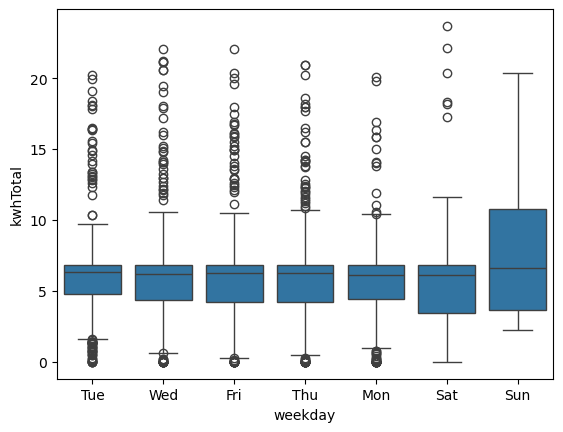

In [22]:
sns.boxplot(x='weekday',y='kwhTotal',data=ev_df)

원본데이터 + 통계량을 같이 표현한다 -> boxplot + stripplot

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.1% of the points cannot be placed; you may 

<Axes: xlabel='weekday', ylabel='kwhTotal'>

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\miniconda3\envs\streamlit_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

75.3% of the points cannot be placed; you may 

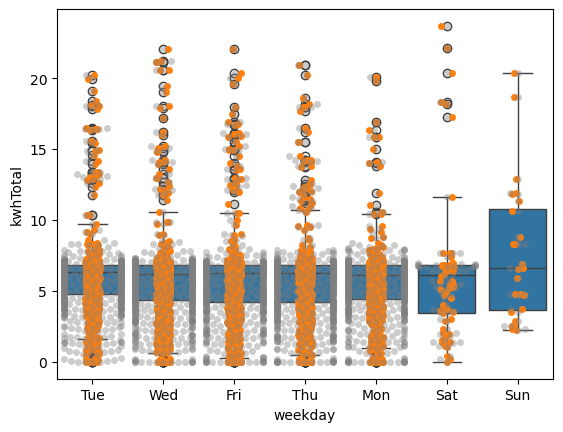

In [25]:
sns.boxplot(x='weekday', y='kwhTotal', data=ev_df)
sns.stripplot(x='weekday', y='kwhTotal', data=ev_df)
sns.swarmplot(x='weekday', y='kwhTotal', data=ev_df, color='grey', alpha=0.4)

# boxplot이 만능이 아니다.
# swarmplot : 값이 겹치지 않는다 -> 분포를 잘 보여준다. 성능 저하 고려

<Axes: xlabel='weekday', ylabel='kwhTotal'>

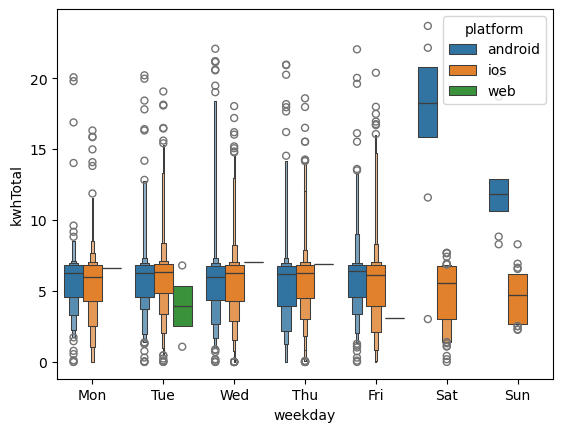

In [30]:
weekday_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.boxenplot(x='weekday', y='kwhTotal', data=ev_df, hue='platform', order=weekday_order)

In [34]:
weekday_orders = {'weekday':weekday_order}

In [36]:
# plotly boxplot
px.box(
    data_frame=ev_df, x='weekday', y='kwhTotal',
    width=500, height=500, category_orders=weekday_orders, color='platform'
).show()

<Axes: xlabel='size', ylabel='tip'>

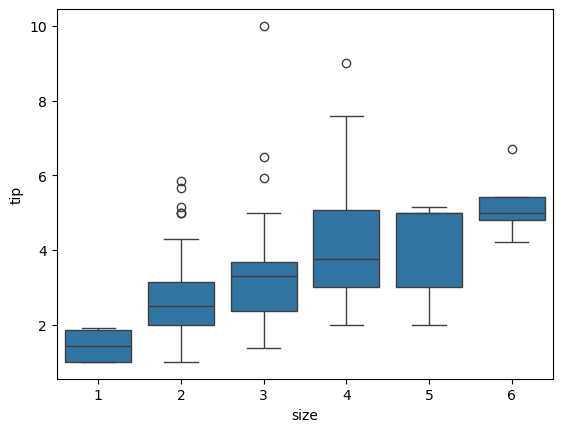

In [40]:
sns.boxplot(x='size', y='tip', data=df)

# 바이올린플롯
박스플롯 + 전체 분포 모양 density 확인

중앙값 + 어디에 많이 몰려 있나, 피크가 어디인가?

C:\Users\Admin\AppData\Local\Temp\ipykernel_24468\3209473407.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='size', ylabel='tip'>

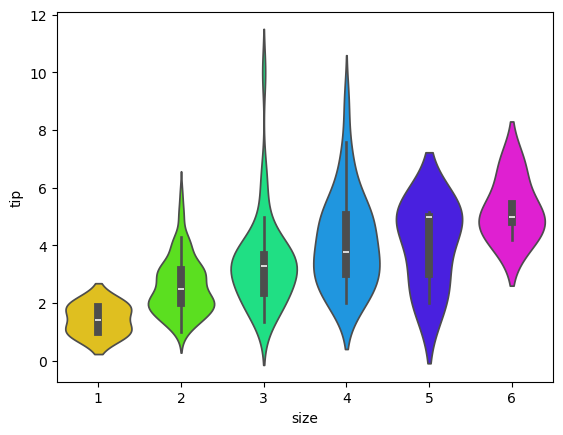

In [45]:
sns.violinplot(x='size', y='tip', data=df, palette='hsv')

# barplot

직선으로 오차구간 : 에러바 클수록 변동성이 크다<br>
막대의 크기 차이가 크지 않다 > 거의 비슷하다, 평균의 차이가 유의미하지 않다<br> 
추가 분석 필요 - 단일 변수로 설명력이 부족

<Axes: xlabel='size', ylabel='tip'>

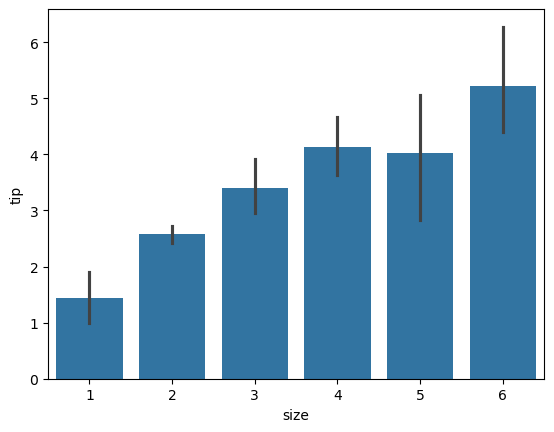

In [43]:
sns.barplot(x='size', y='tip', data=df)

# 히스토그램

# countplot

범주형 변수의 빈도수를 표현하는 차트

<Axes: xlabel='day', ylabel='count'>

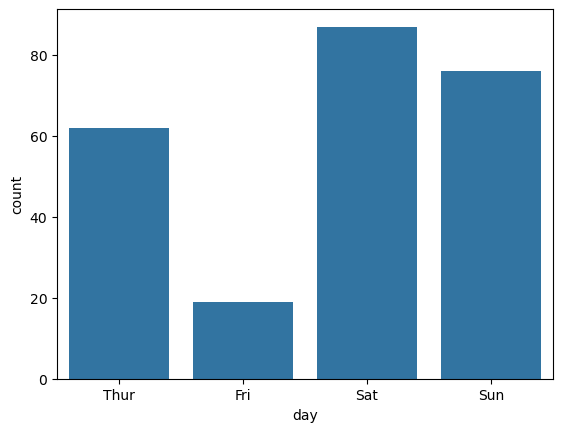

In [49]:
sns.countplot(x=df['day'])

# pointplot
에러바가 추가된  line 차트

<Axes: xlabel='day', ylabel='tip'>

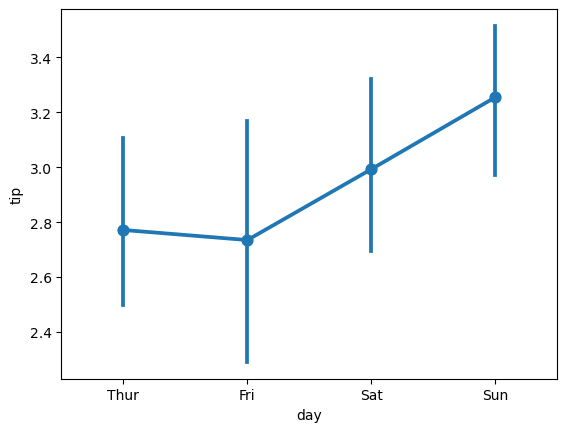

In [52]:
sns.pointplot(x='day', y='tip', data=df)

# histplot
수치형 변수들의 분포 - bin단위로 나누어 표현해주는 차트

<Axes: xlabel='total_bill', ylabel='Count'>

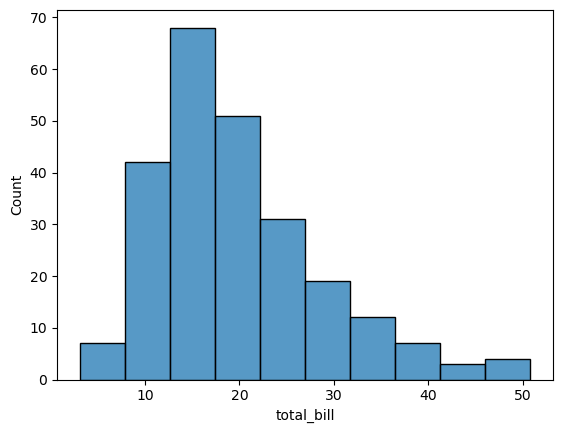

In [57]:
sns.histplot(x='total_bill', data= df, bins=30, binwidth=5)

<Axes: xlabel='total_bill', ylabel='Count'>

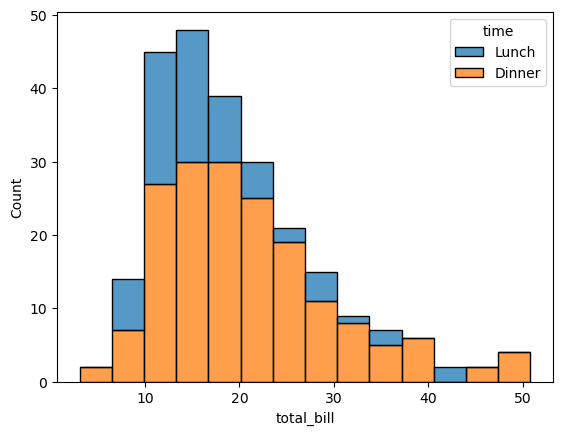

In [60]:
# 다른 변수의 그룹별로 막대 나누기
sns.histplot(x='total_bill', data= df, hue='time', multiple='stack') 

In [74]:
# plotly histogram
px.histogram(data_frame=df, x='total_bill', width=500, 
            color='time', barmode='overlay')

In [76]:
px.bar(data_frame=df, x='size', y='total_bill', color='time')

# heatmap
데이터를 요약(합계, 평균, ...)한 결과를 색깔로 시각화<br>
요약 - 피봇 테이블 (탐색) - 인사이트 시각화 히트맵

C:\Users\Admin\AppData\Local\Temp\ipykernel_24468\1188468914.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



<Axes: xlabel='size', ylabel='day'>

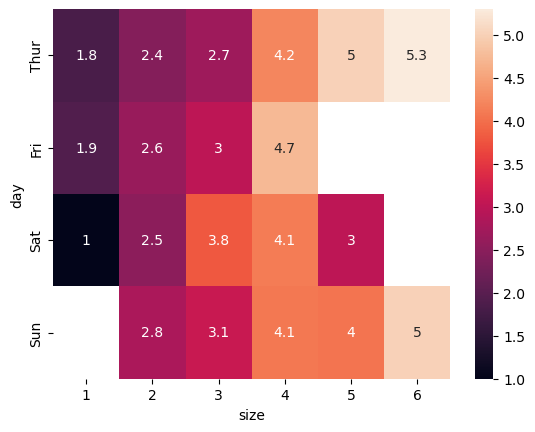

In [80]:
# 요약
pivot_df = df.pivot_table('tip', 'day', 'size')
# 시각화
sns.heatmap(pivot_df, annot=True)

In [81]:
pivot_df.fillna(0,inplace=True)

<Axes: xlabel='size', ylabel='day'>

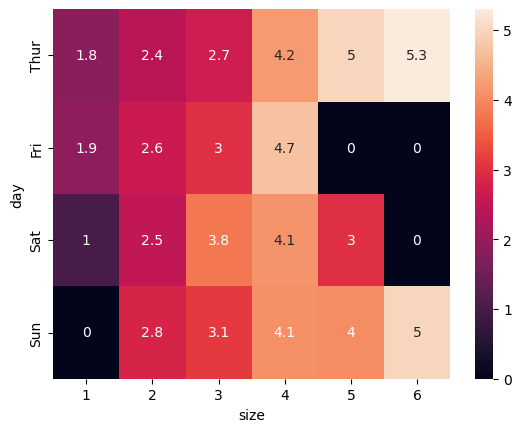

In [82]:
sns.heatmap(pivot_df, annot=True)

In [84]:
# plotly.imshow()
px.imshow(
    pivot_df, x=pivot_df.columns, y=pivot_df.index.astype('str'),   
    width=400, height=400, text_auto='.2e'
)

# facetgrid
데이터를 범주형 변수에 따라 나눠서 각각 시각화

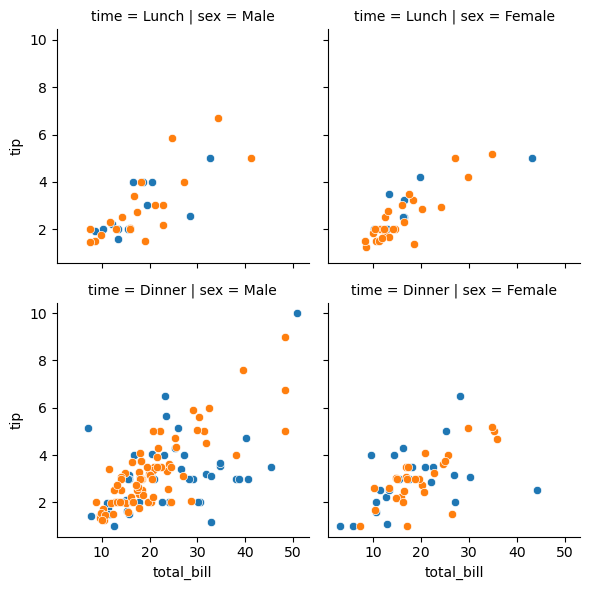

In [87]:
g= sns.FacetGrid(df, col='sex', row='time', hue='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')

#  parallel_coordinates
평행좌표 플롯

In [89]:
iris_df = px.data.iris()
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [91]:
px.parallel_categories(
    iris_df,
    color='species_id',
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2
    
)

In [93]:
px.parallel_categories(
    df,
    color='size',
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2
    
)